![img](vino_head.jpg)

## Clustering de vino

El objetivo es generar clusters para separar vinos con caracteristicas similares

### Importar el dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../python-ml-course/datasets/wine/winequality-red.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

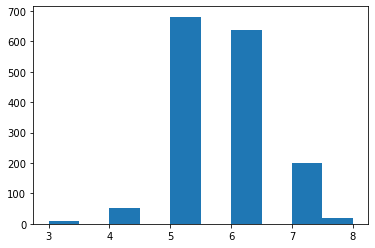

In [4]:
plt.hist(data["quality"])

In [5]:
data.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Podemos deducir que la volatidad del acido, los cloruros, acidos y PH influyen en la calidad otorgoda al vino

### Normalizamos los datos

In [6]:
data_norm = (data-data.min())/(data.max()-data.min())
data_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


### Armamos el Clustering jerárquico

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
# Armamos los cluster con la función de Sklearn

clus = AgglomerativeClustering(n_clusters = 6, linkage="ward").fit(data_norm)

In [9]:
# Pasamos los valores a una serie y vemos a que cluster fueron asignados los primeros registros

md = pd.Series(clus.labels_)
md.head()

0    2
1    2
2    2
3    3
4    2
dtype: int64

Text(0, 0.5, 'Cantidad de registros')

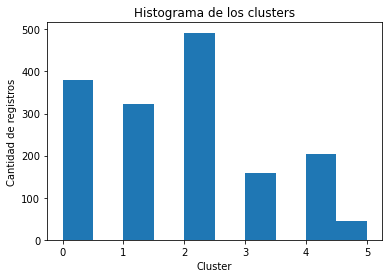

In [10]:
plt.hist(md)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de registros")

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
Z = linkage(data_norm, "ward")

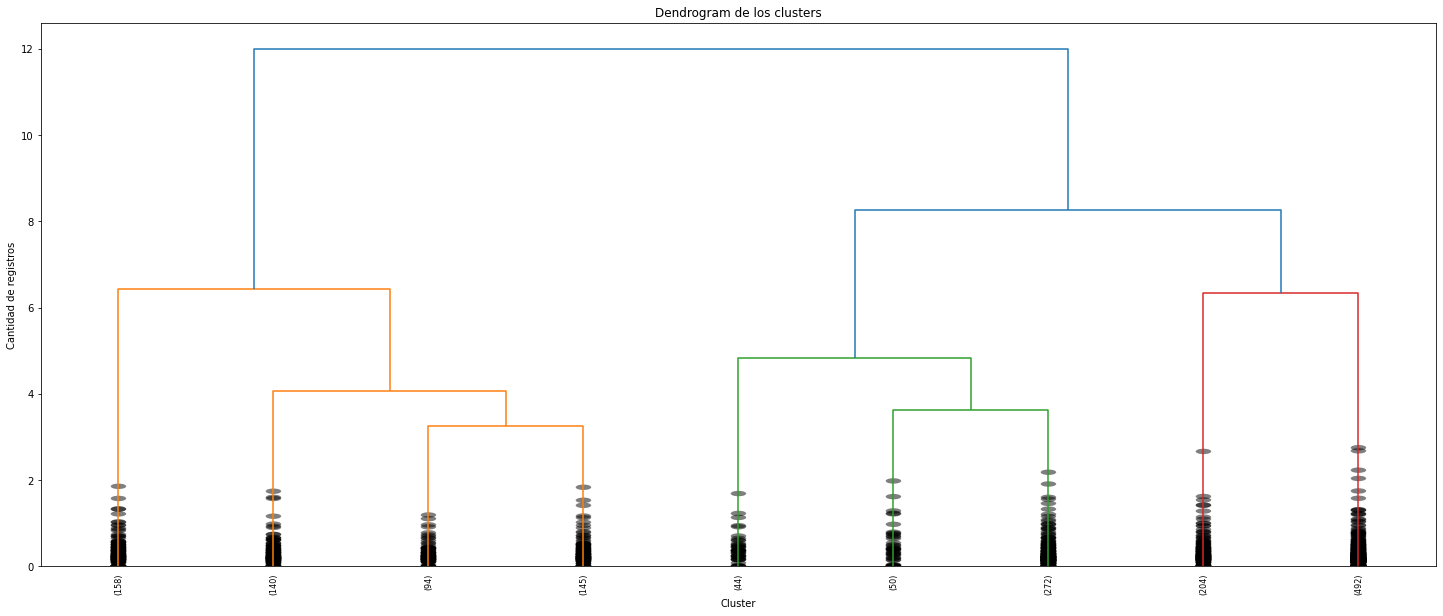

In [13]:
plt.figure(figsize=(25, 10))
plt.title("Dendrogram de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de registros")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., color_threshold=8, 
           truncate_mode="lastp", p=9, show_leaf_counts=True, show_contracted=True)
plt.show()

### Armamos los clusters con el metodo de K-means

In [14]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [15]:
model = KMeans(n_clusters = 6)
model.fit(data_norm)

KMeans(n_clusters=6)

In [16]:
md_k = pd.Series(model.labels_)

In [17]:
data["clust_j"] = md
data["clust_k"] = md_k

In [18]:
data_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [19]:
# Centroide de cada Cluster

model.cluster_centers_

array([[0.24035022, 0.3827328 , 0.07151596, 0.09338567, 0.12071094,
        0.16390096, 0.10718179, 0.48174813, 0.51964316, 0.15428717,
        0.23440398, 0.43085106],
       [0.59711875, 0.20253265, 0.55037209, 0.13364129, 0.16638584,
        0.1445791 , 0.09609664, 0.66020899, 0.31653543, 0.24996519,
        0.29922481, 0.5572093 ],
       [0.36949776, 0.15467295, 0.43337662, 0.10733559, 0.10537042,
        0.16590452, 0.08404081, 0.40418343, 0.41244844, 0.23993571,
        0.50642691, 0.71515152],
       [0.31897164, 0.27879712, 0.30613139, 0.16190881, 0.12840744,
        0.405238  , 0.31149571, 0.54074086, 0.43036956, 0.19058962,
        0.21918398, 0.45255474],
       [0.17551622, 0.31760528, 0.09634259, 0.09370244, 0.09543684,
        0.24771779, 0.12411661, 0.31965859, 0.57706328, 0.18743069,
        0.49824311, 0.61759259],
       [0.33773242, 0.2734237 , 0.29013937, 0.09142762, 0.13991379,
        0.13736075, 0.12584184, 0.52331067, 0.41038163, 0.18923825,
        0.2108818 ,

### Interpetración final

In [20]:
data.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_j
clust_k,,,,,,,,,,,,,
0,7.315957,0.678790,0.071516,2.263431,0.084306,12.636968,36.332447,0.996631,3.399947,0.587660,9.923626,5.154255,2.122340
1,11.347442,0.415698,0.550372,2.851163,0.111665,11.265116,33.195349,0.999062,3.142000,0.747442,10.344961,5.786047,2.474419
2,8.775325,0.345823,0.433377,2.467100,0.075117,12.779221,29.783550,0.995575,3.263810,0.730693,11.691775,6.575758,0.082251
3,8.204380,0.527044,0.306131,3.263869,0.088916,29.771898,94.153285,0.997435,3.286569,0.648285,9.824696,5.262774,1.062044
4,6.583333,0.583704,0.096343,2.268056,0.069167,18.587963,41.125000,0.994424,3.472870,0.643009,11.638580,6.087963,3.412037
5,8.416376,0.519199,0.290139,2.234843,0.095808,10.752613,41.613240,0.997197,3.261185,0.646028,9.770732,5.414634,1.529617


Obtenemos los valores promedios de las caracteristicas de los diversos vinos, donde a caracteristicas similares podemos agruparlo. Se podria hacer un modelo de predictivo para complementar este cluster